In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv("data\BankChurners.csv")

In [3]:
len(df.columns)

23

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[20:22], axis=1, inplace=True)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [5]:
df.describe(include=[object])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [6]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.loc[df['Attrition_Flag'] == "Attrited Customer",["Attrition_Flag"]] = 0
df.loc[df['Attrition_Flag'] == "Existing Customer",["Attrition_Flag"]] = 1
df[["Attrition_Flag"]] = df[["Attrition_Flag"]].astype(int)

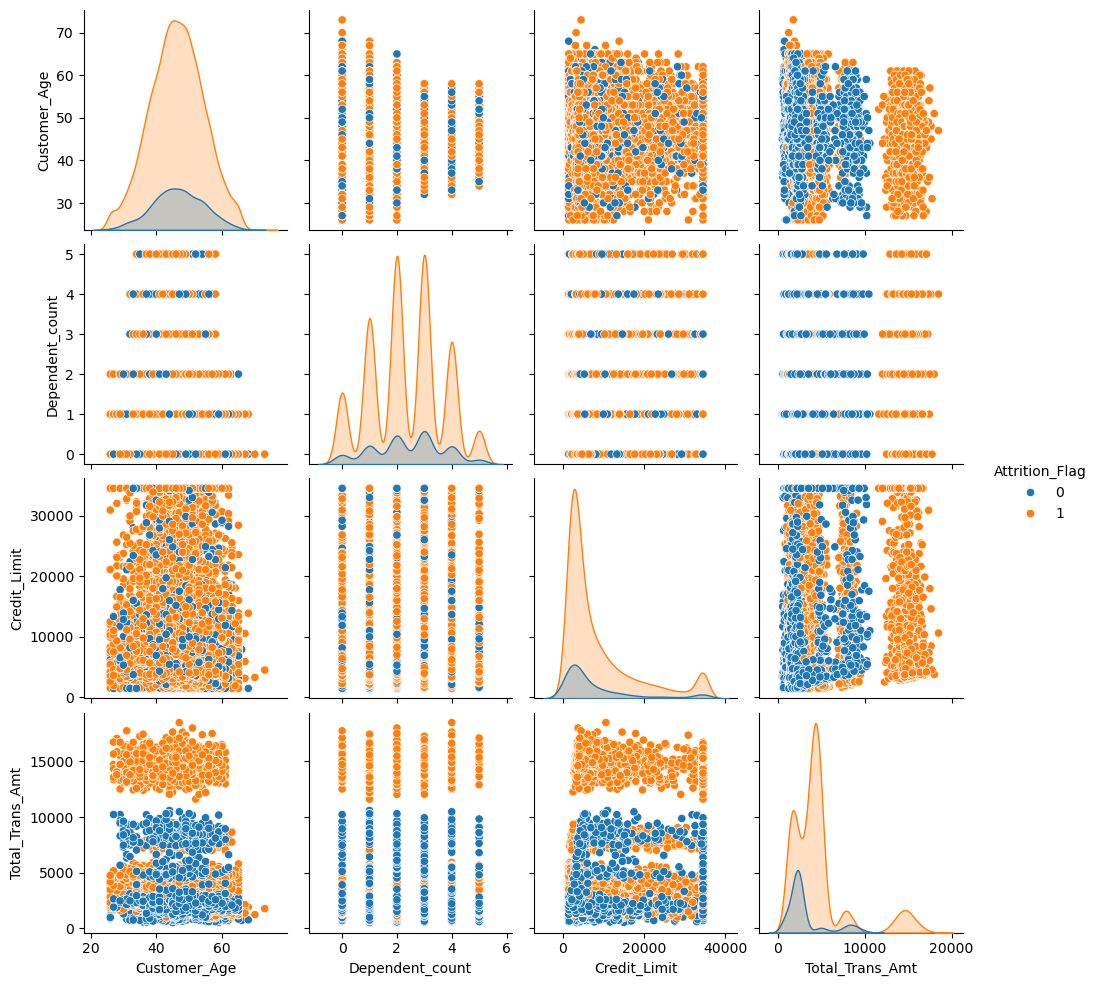

In [9]:
g = sns.pairplot(df[['Customer_Age', 'Dependent_count','Credit_Limit', 'Attrition_Flag','Total_Trans_Amt']], hue = 'Attrition_Flag')

In [10]:
df.Total_Trans_Ct.mean()

64.85869457884863

<AxesSubplot:>

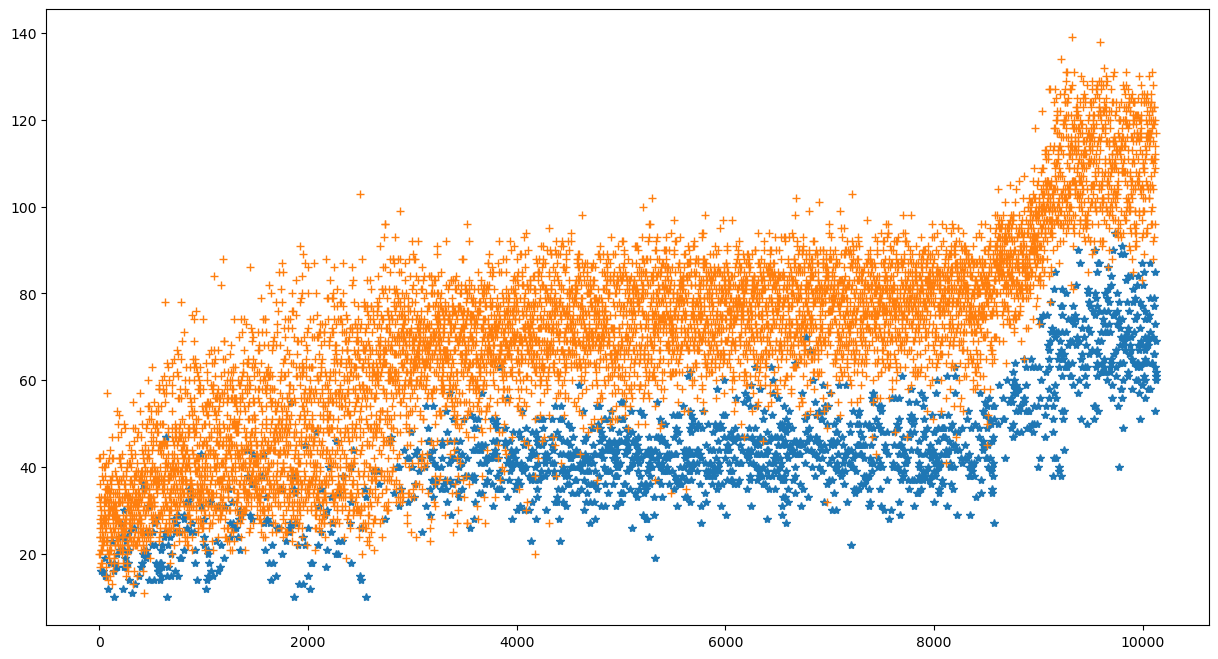

In [11]:
df[df.Attrition_Flag == 0].Total_Trans_Ct.plot(style="*")
df[df.Attrition_Flag == 1].Total_Trans_Ct.plot(style="+")

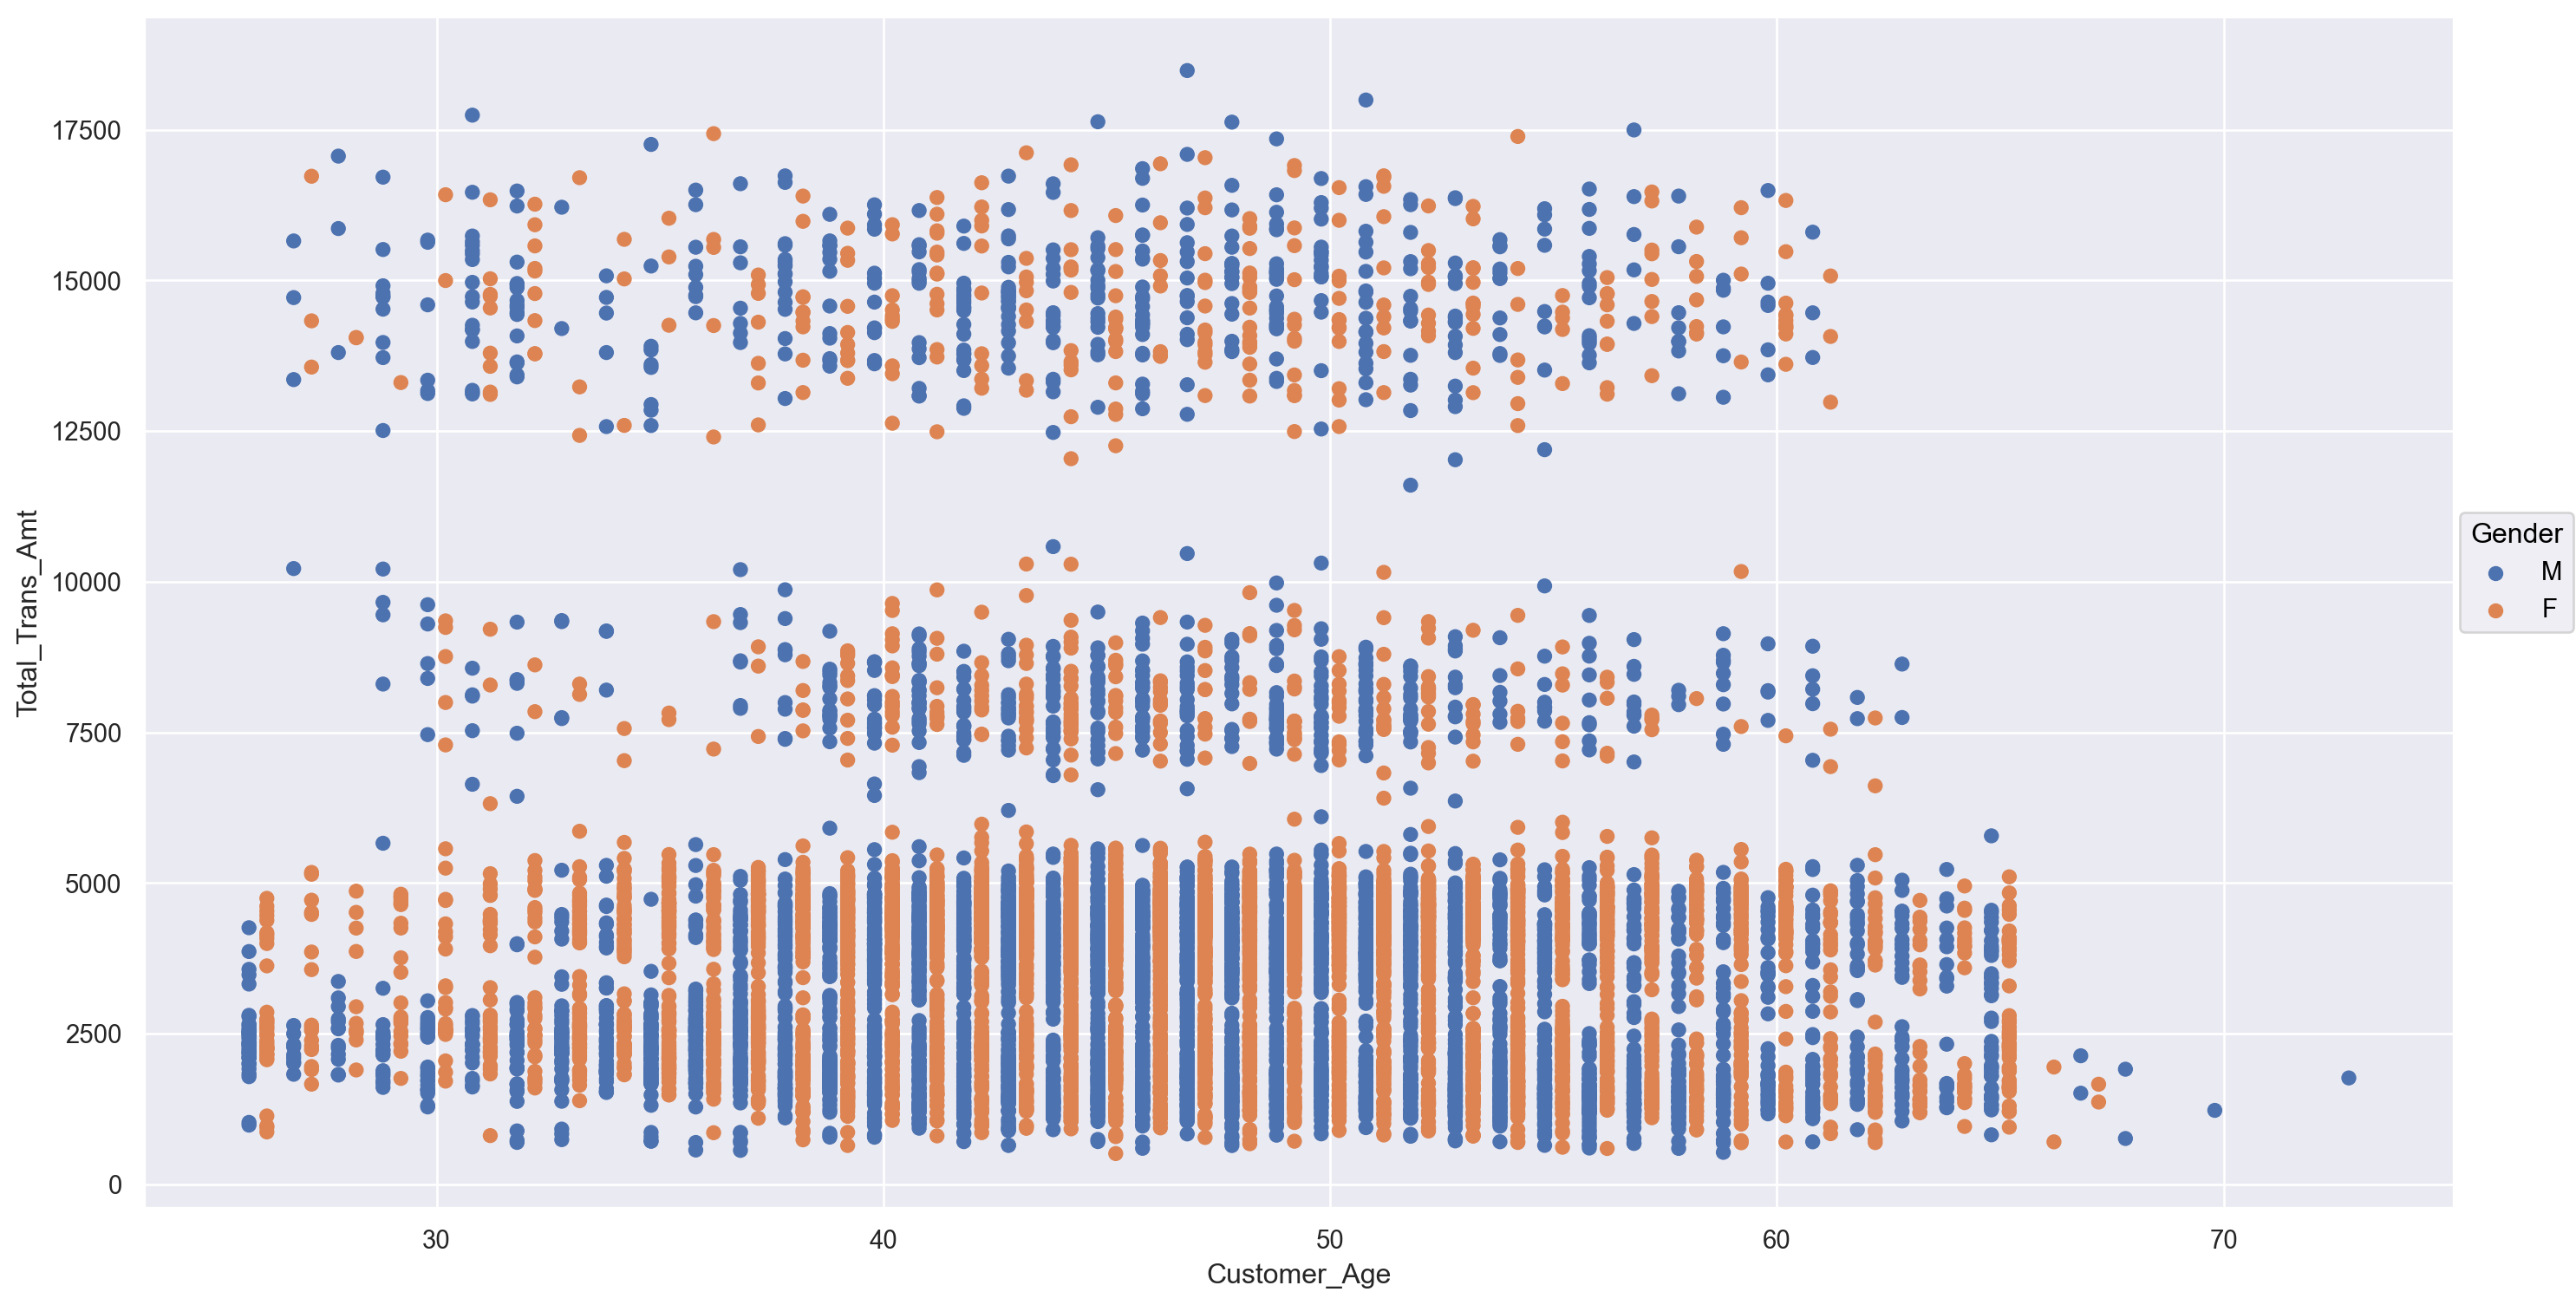

In [12]:
(
    so.Plot(df, x="Customer_Age", y="Total_Trans_Amt", color="Gender").add(so.Dot(), so.Dodge()).layout(size=(15, 8))
)

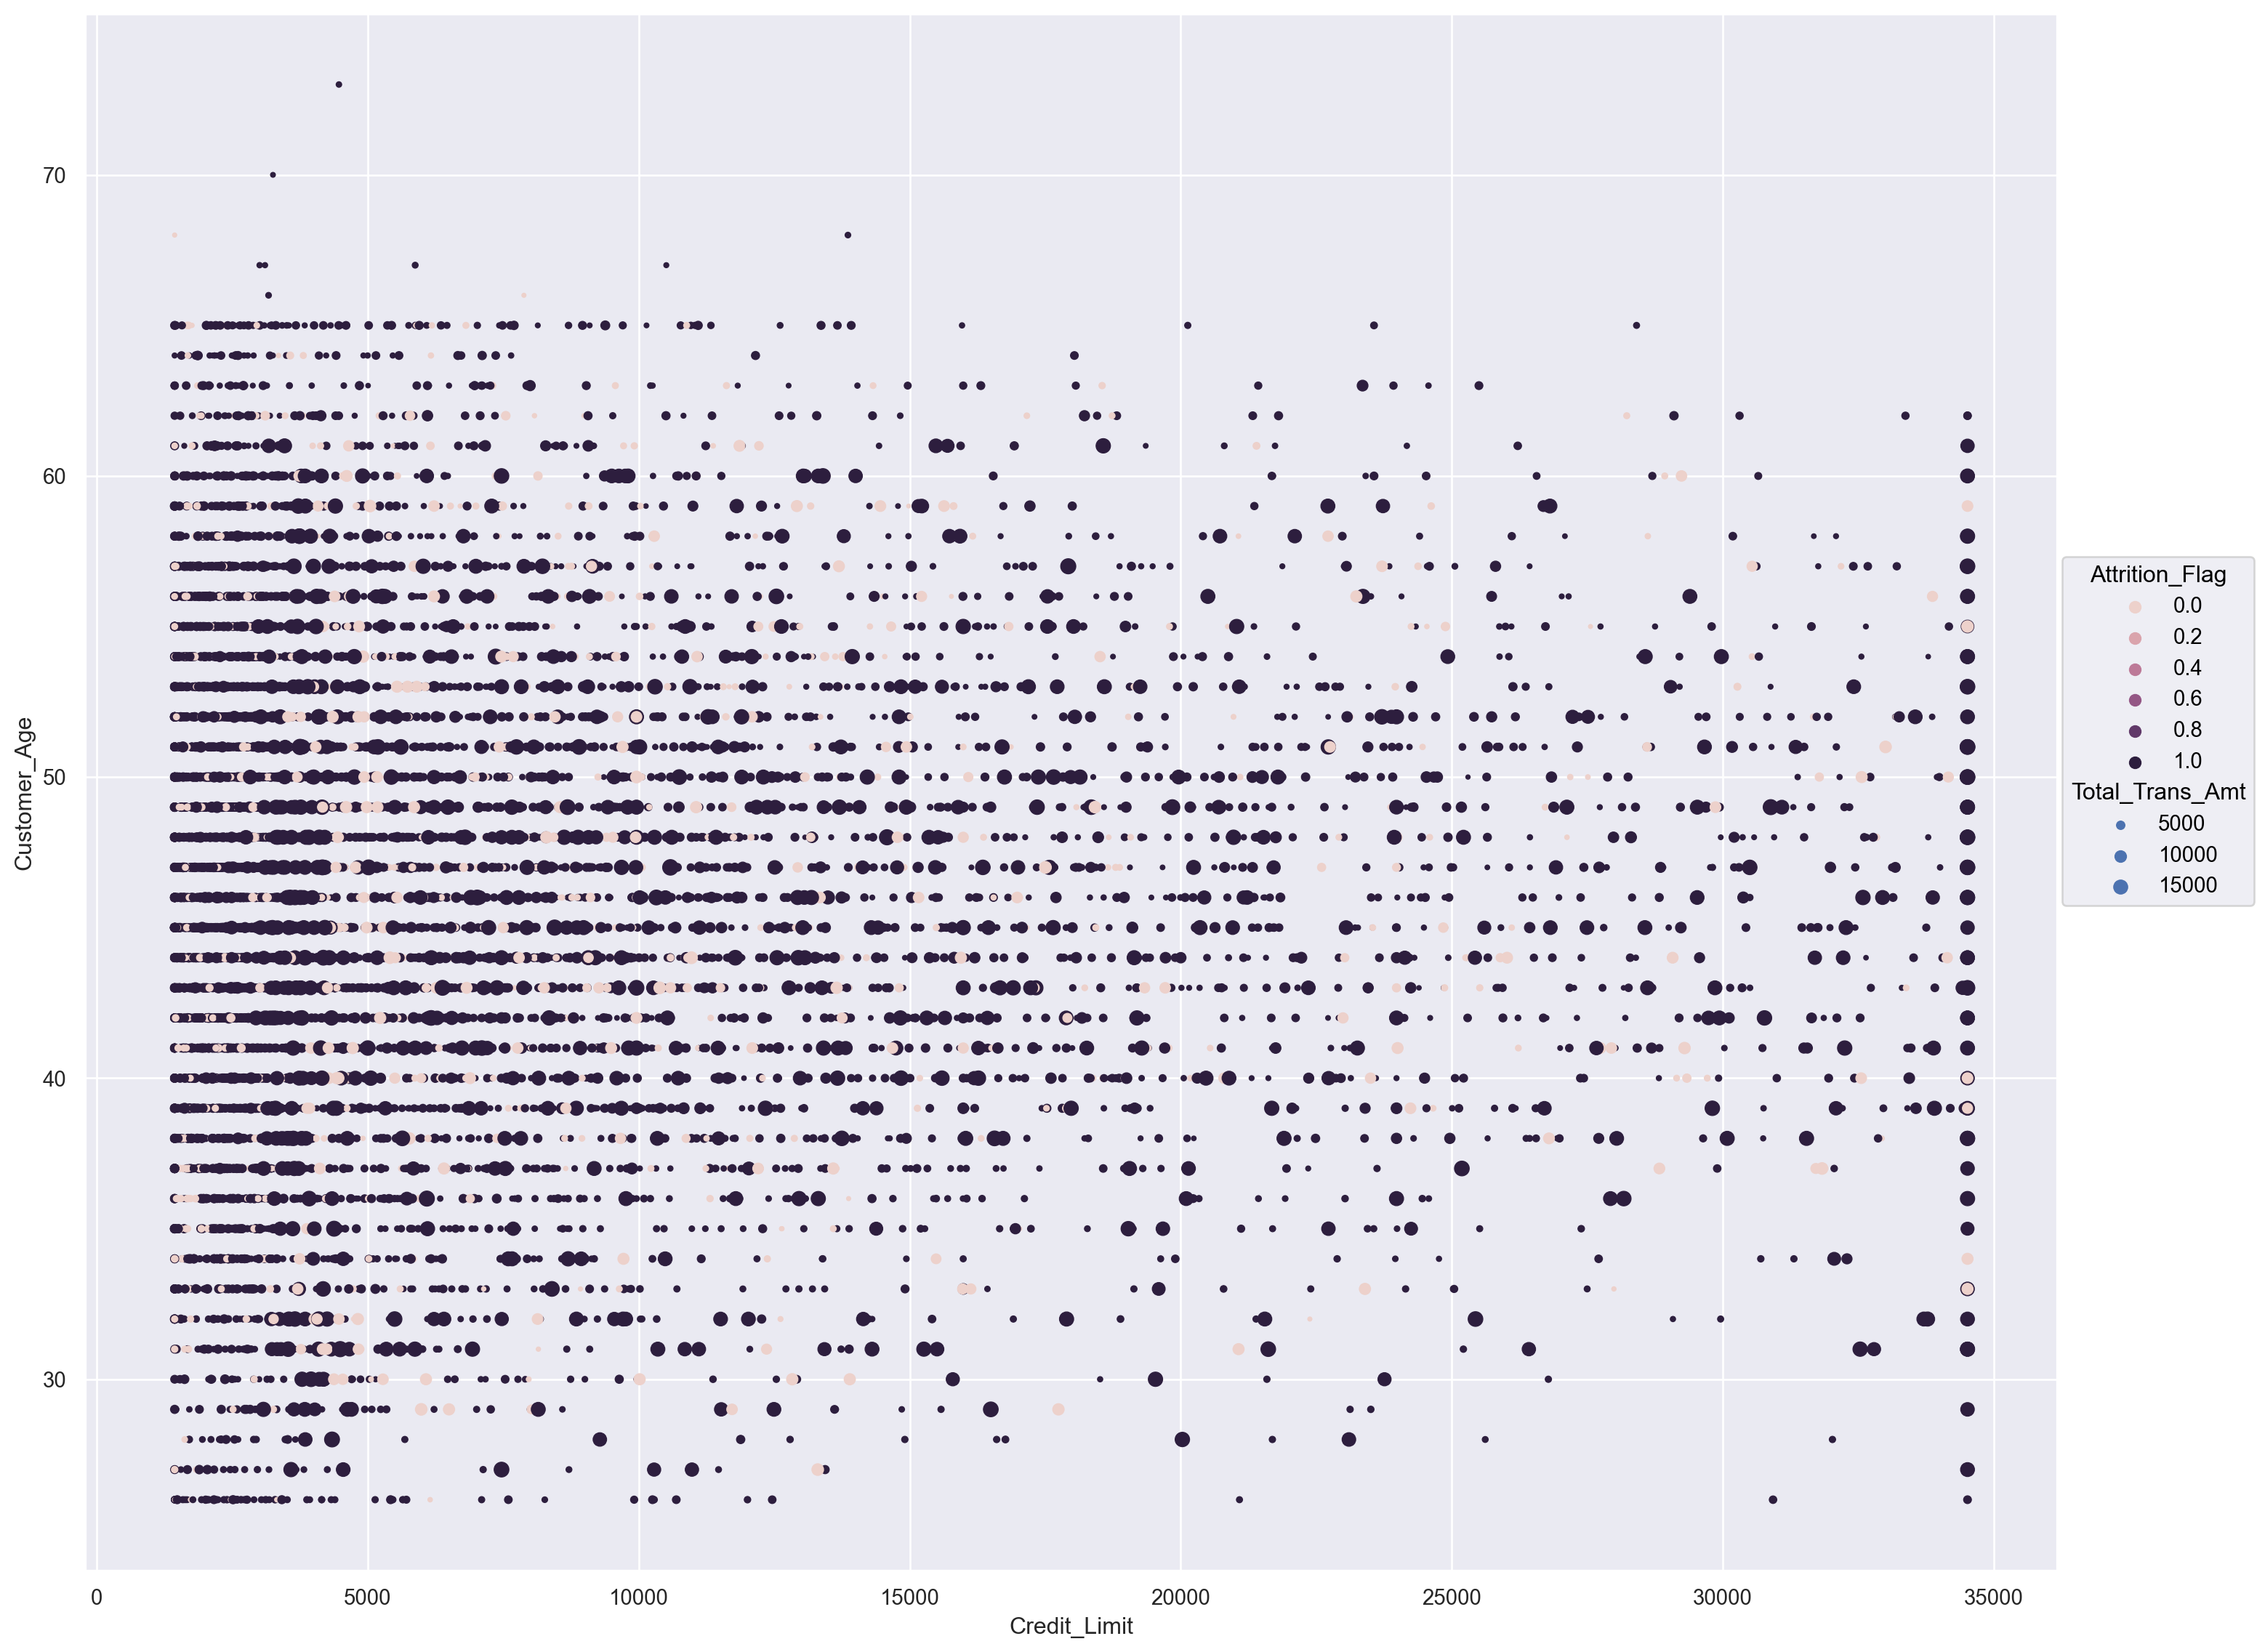

In [13]:
(
    so.Plot(
        df, x="Credit_Limit", y="Customer_Age",
        color = "Attrition_Flag",
        pointsize="Total_Trans_Amt",
    )
    .add(so.Dot()).layout(size=(15, 12))
)

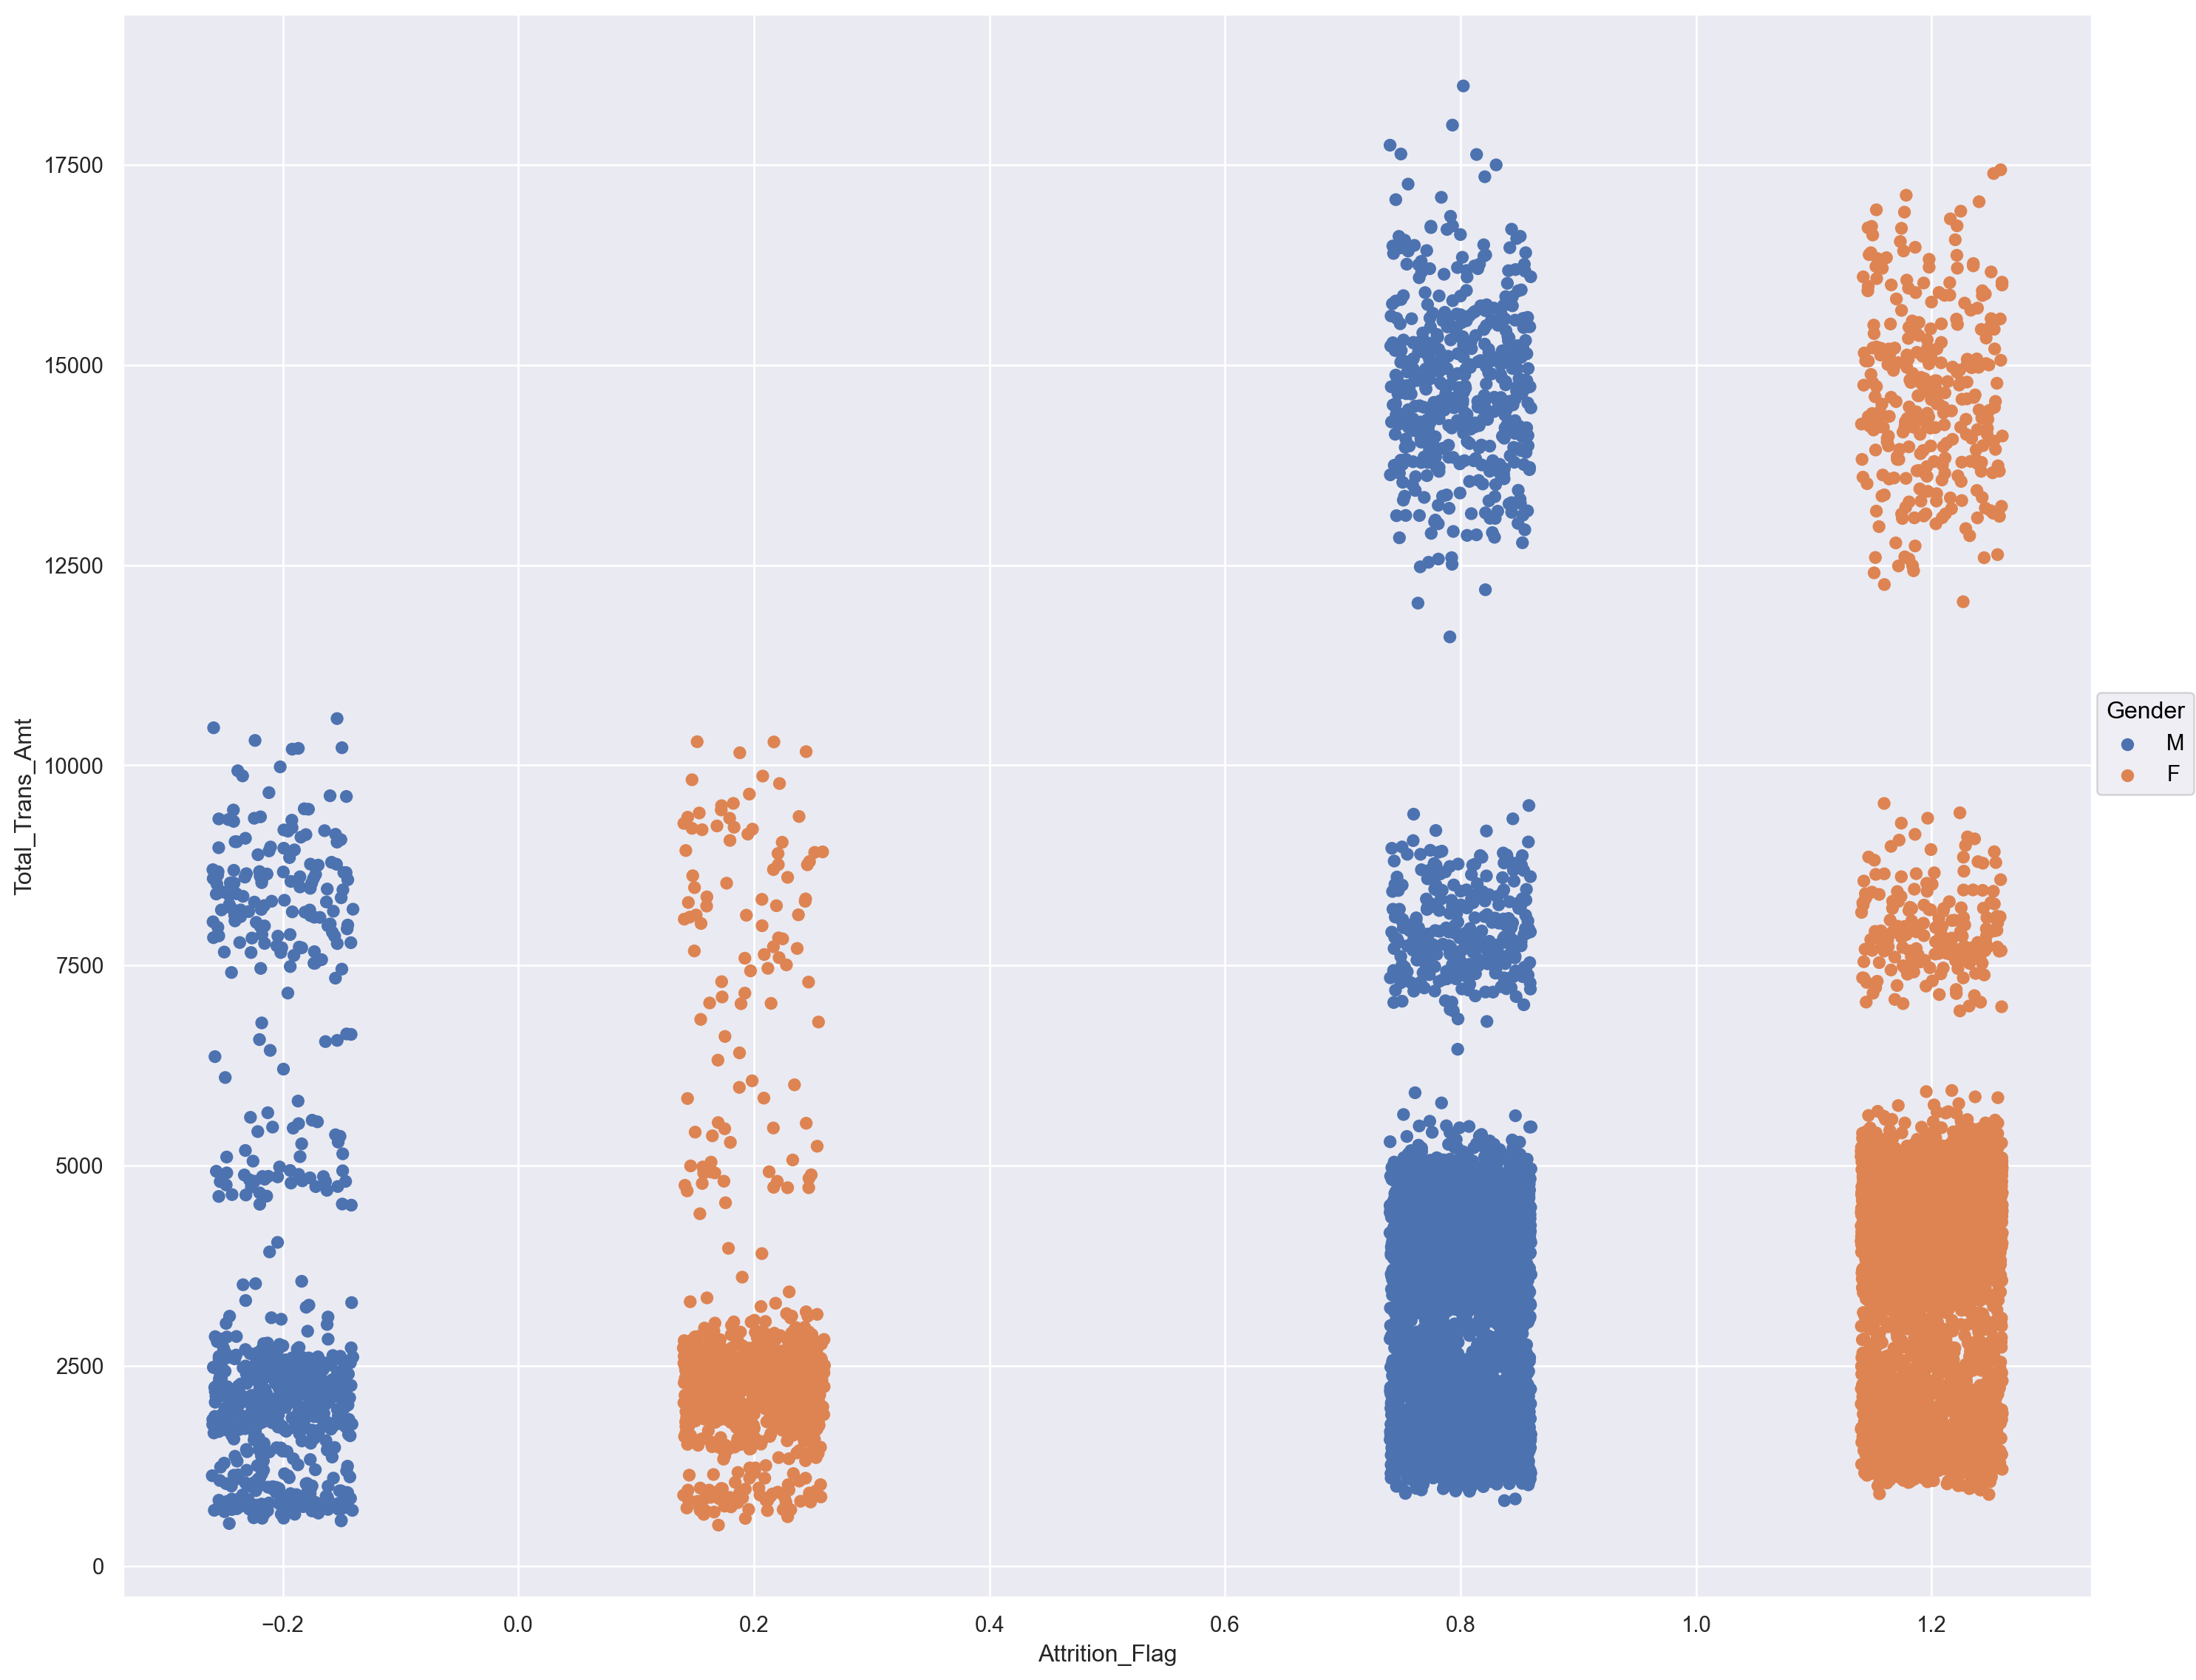

In [14]:
(
    so.Plot(df, x="Attrition_Flag", y="Total_Trans_Amt", color="Gender")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3)).layout(size=(15, 12))
)

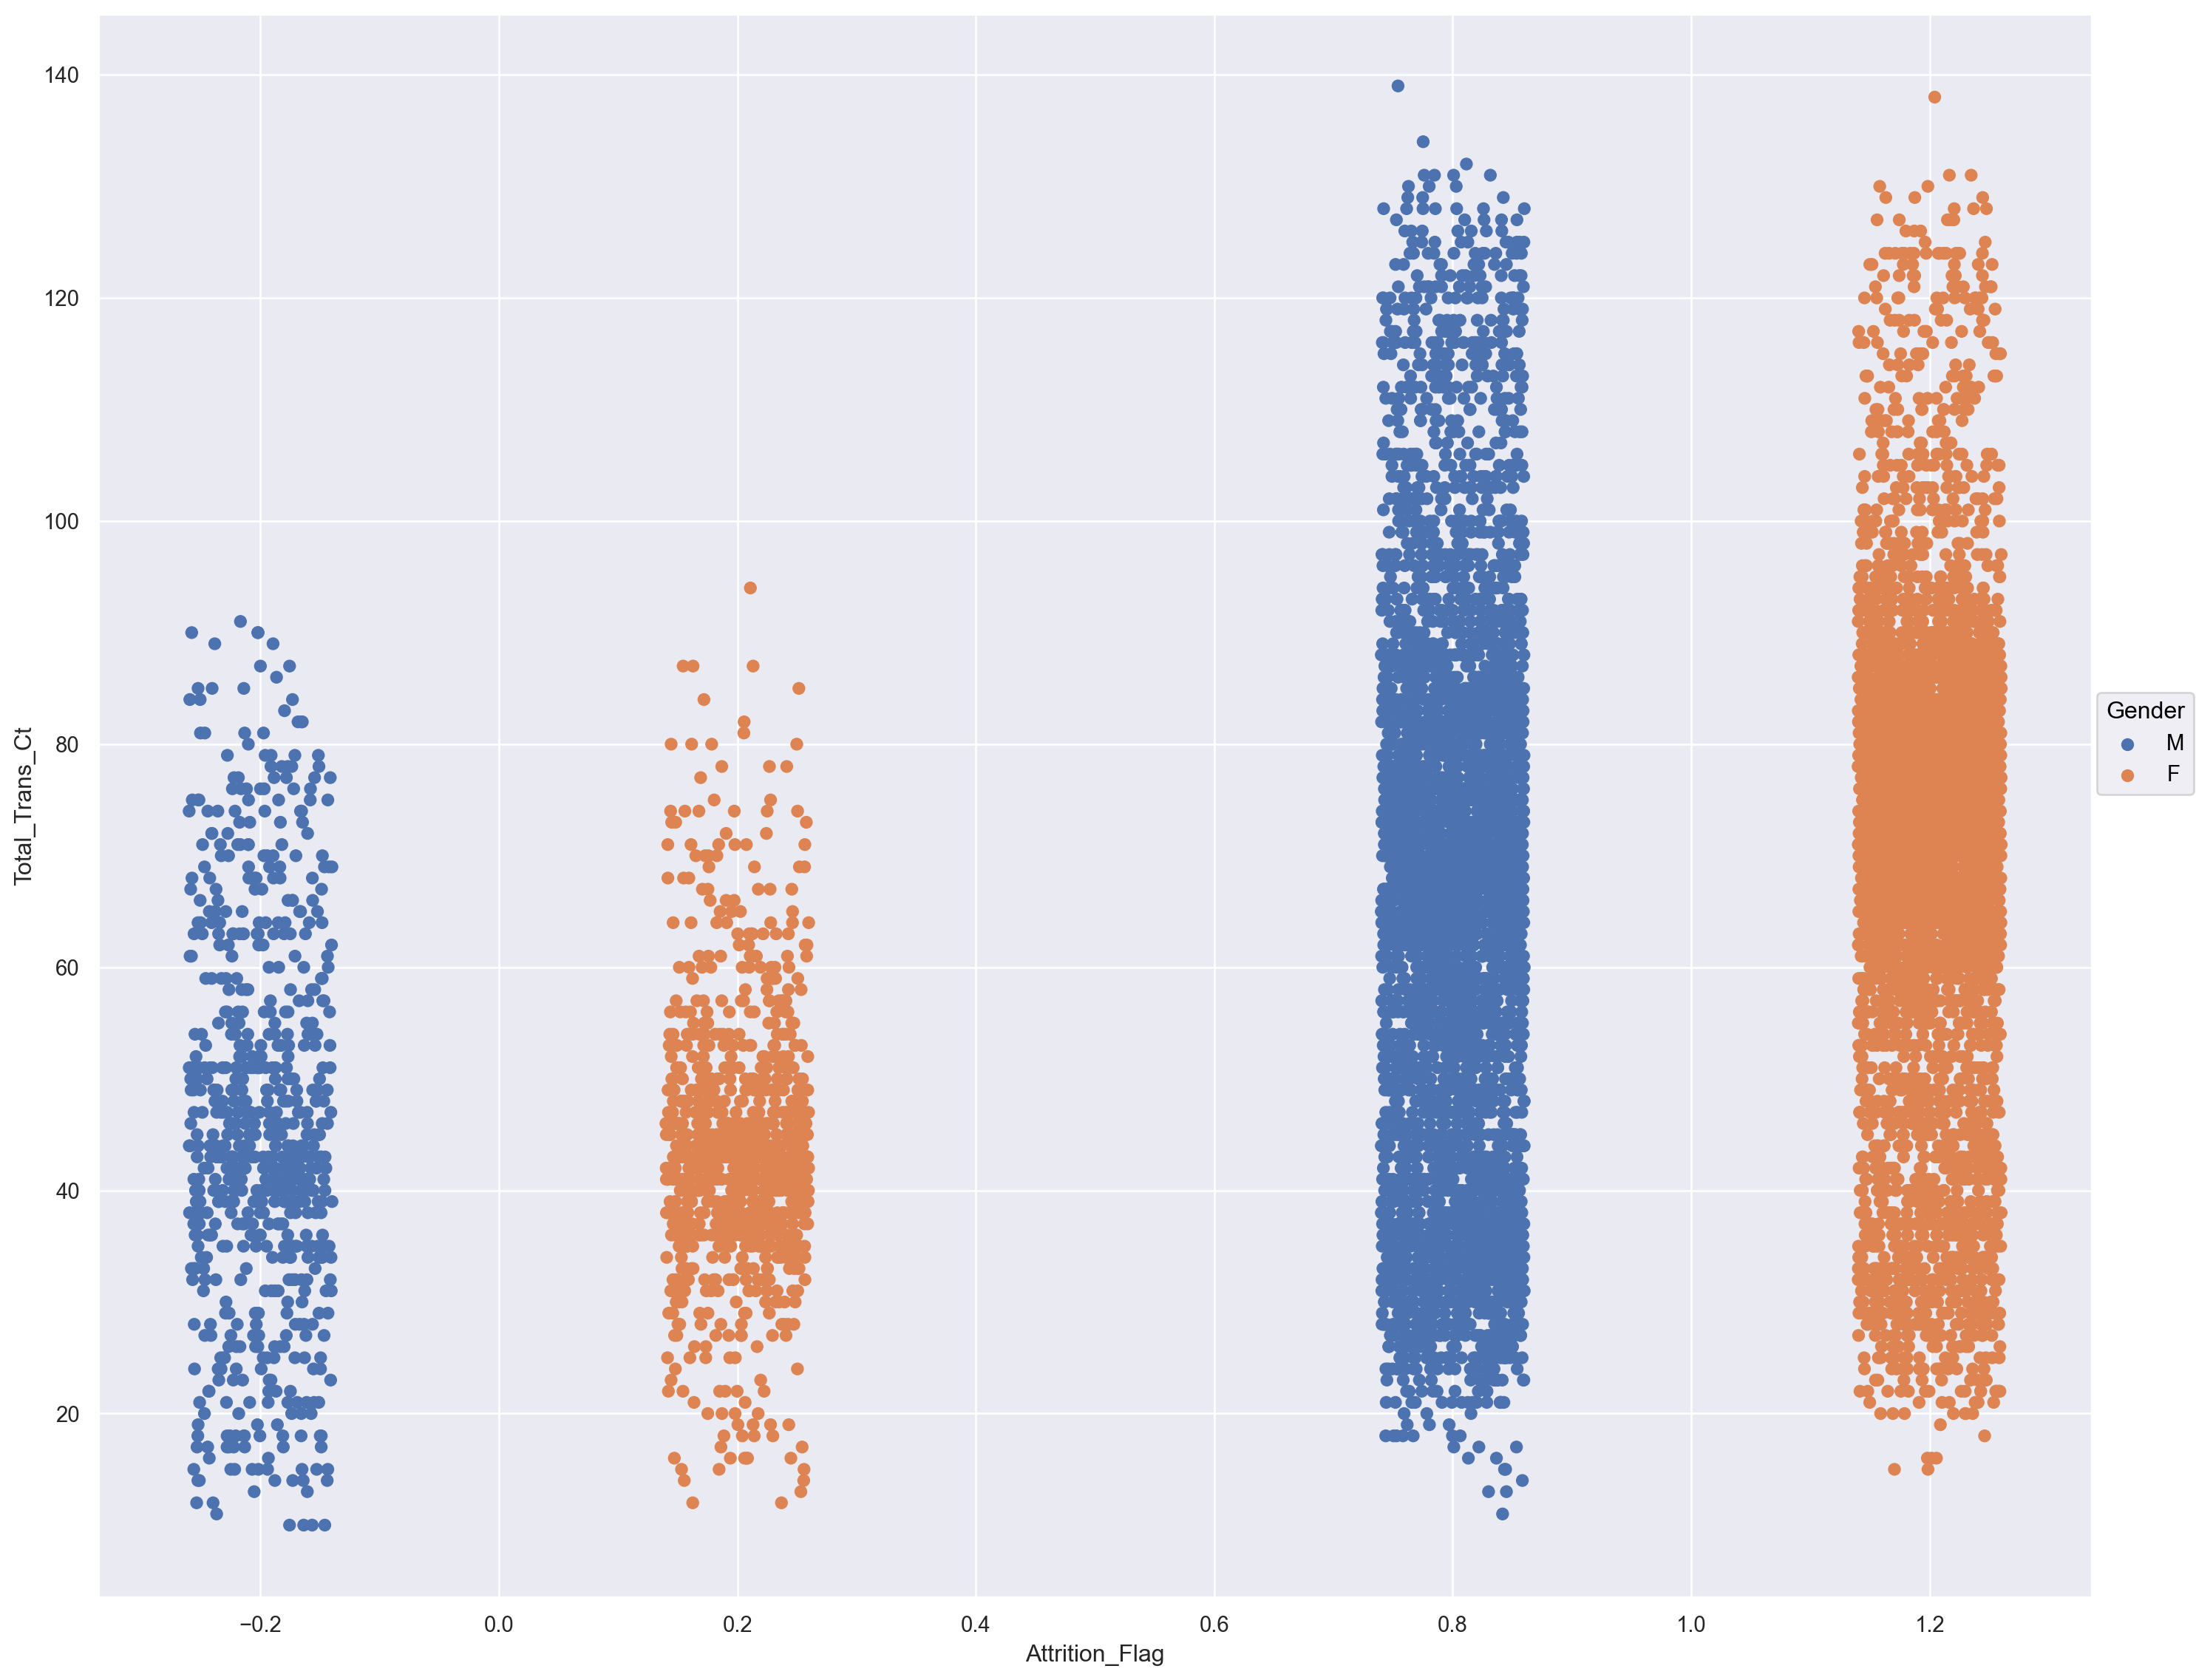

In [15]:
(
    so.Plot(df, x="Attrition_Flag", y="Total_Trans_Ct", color="Gender")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3)).layout(size=(15, 12))
)

In [16]:
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtypes == 'O':
        categorical.append(col)
    else:
        numerical.append(col)
categorical

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [17]:
# for cat in categorical:
#     plt.figure(figsize=(20,5))
#     ax = sns.countplot(df[cat], palette = 'rainbow')
#     plt.show()

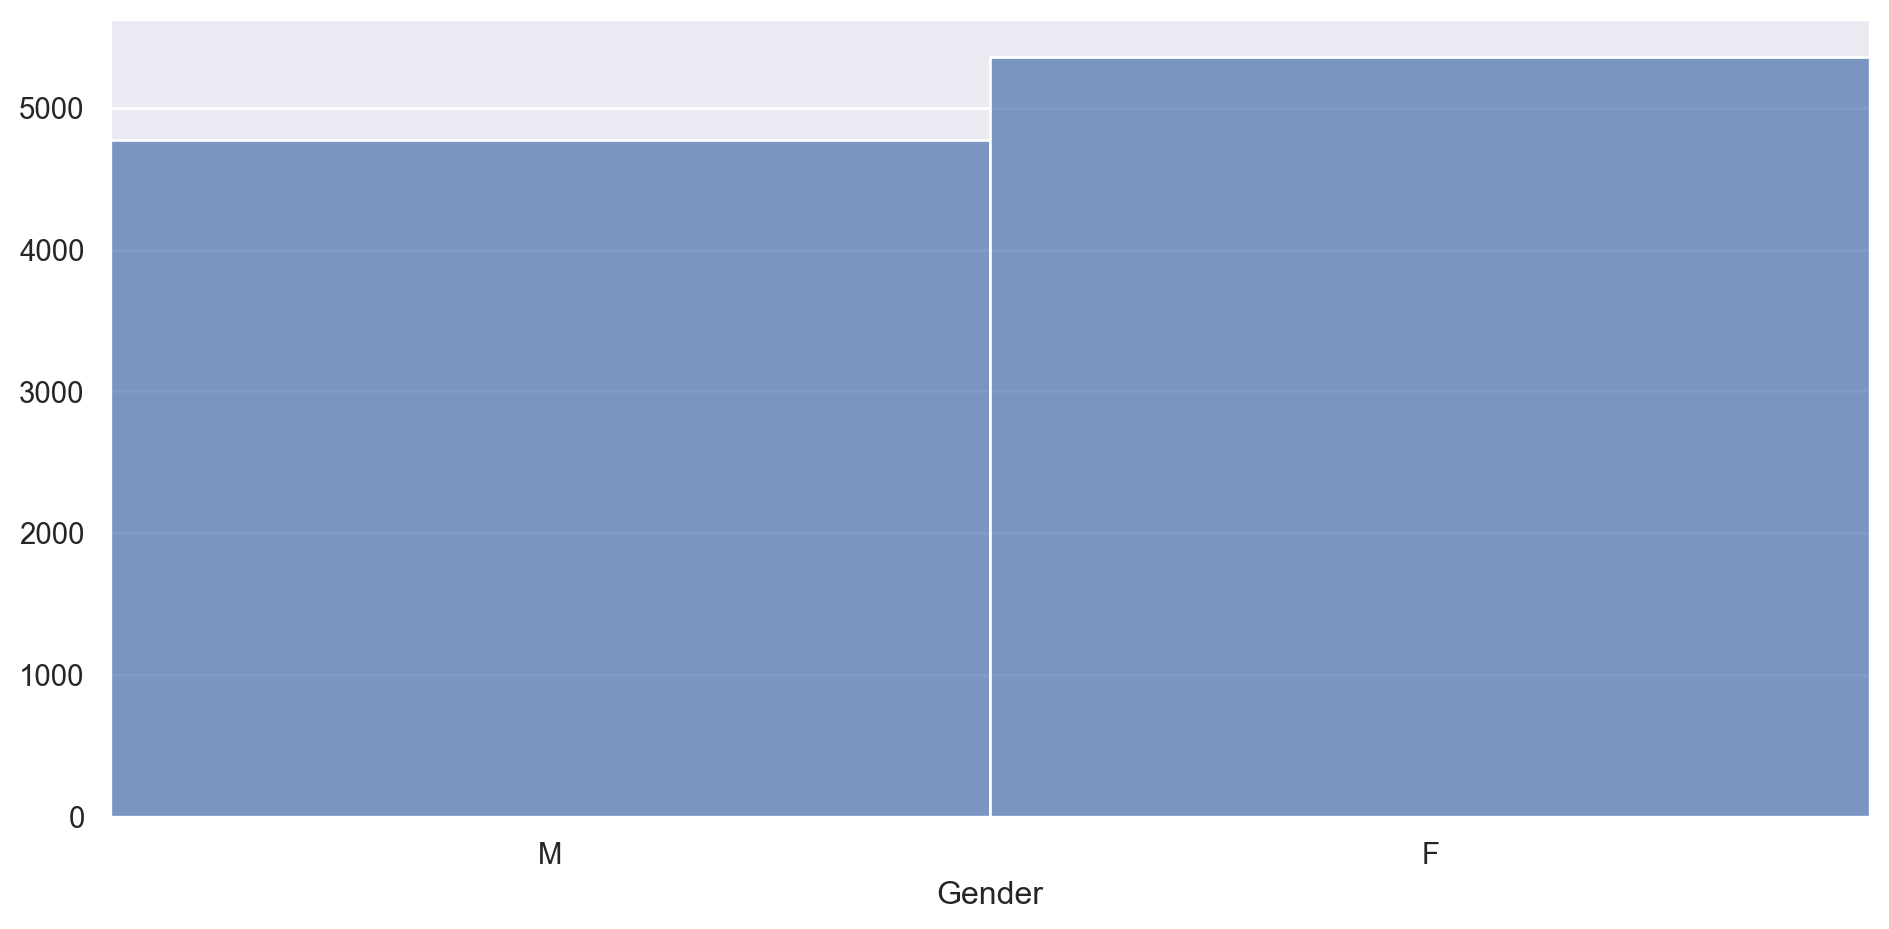

In [18]:
p = so.Plot(df, categorical[0]).layout(size=(10, 5))
p.add(so.Bars(), so.Hist())

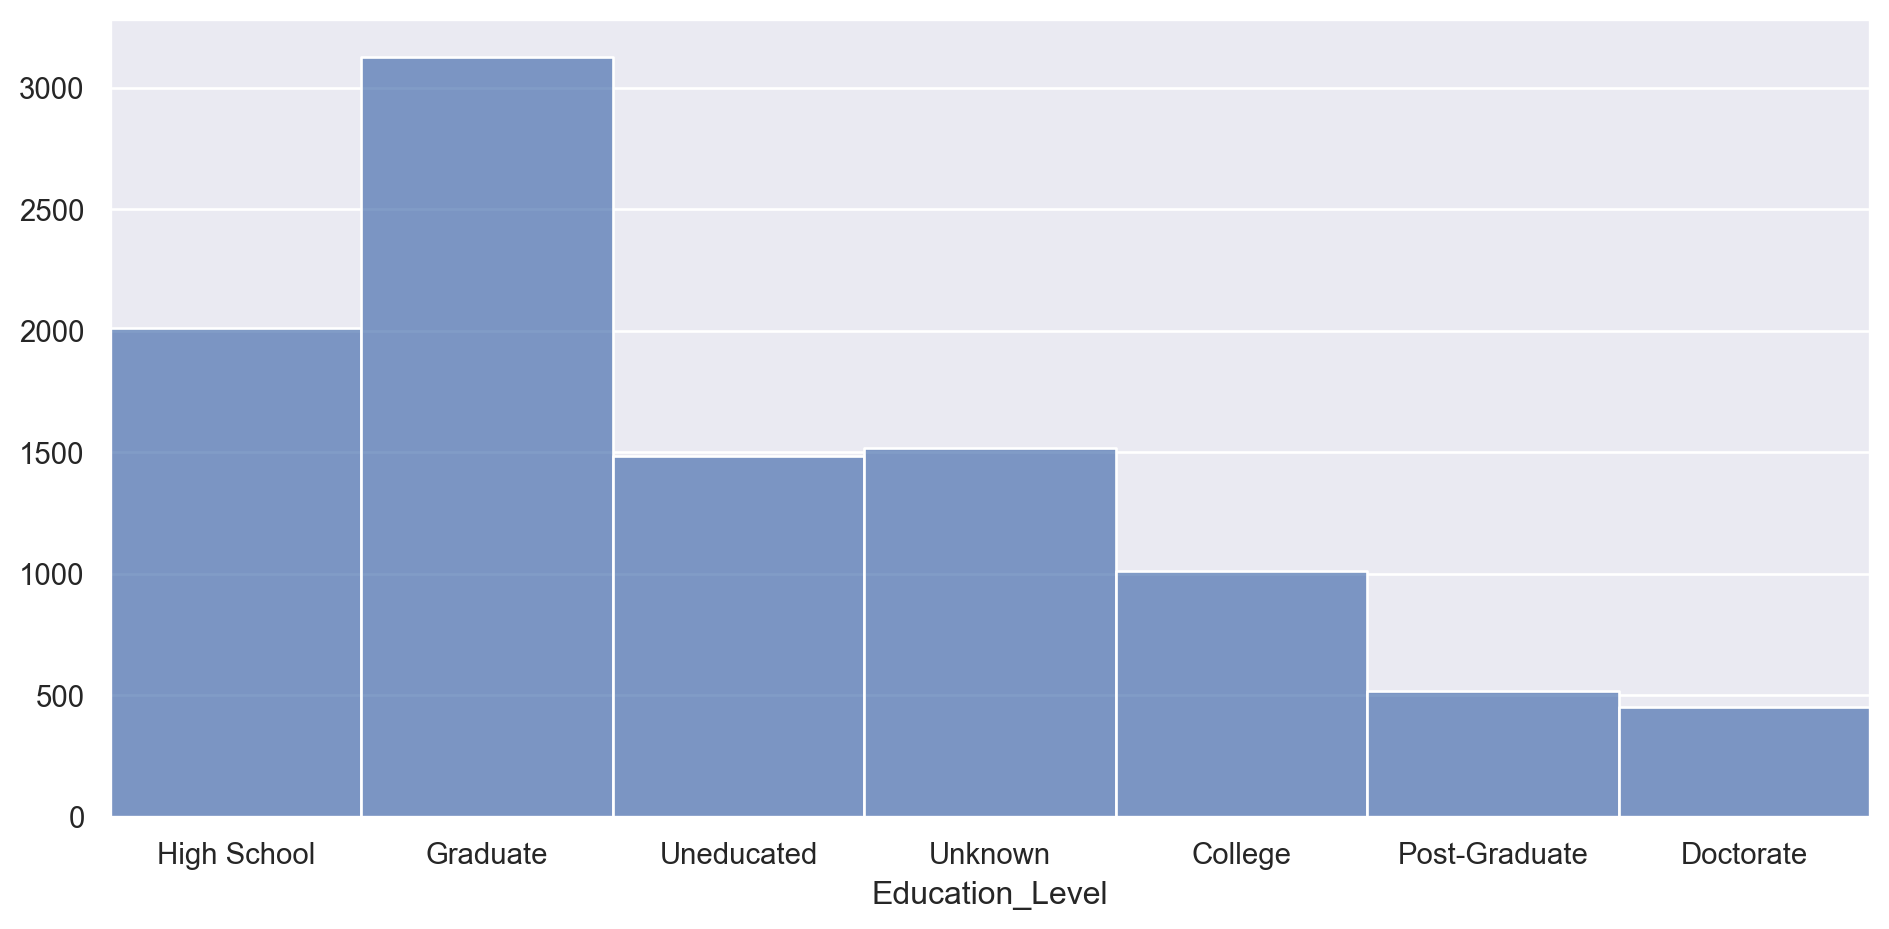

In [19]:
p = so.Plot(df, categorical[1]).layout(size=(10, 5))
p.add(so.Bars(), so.Hist())

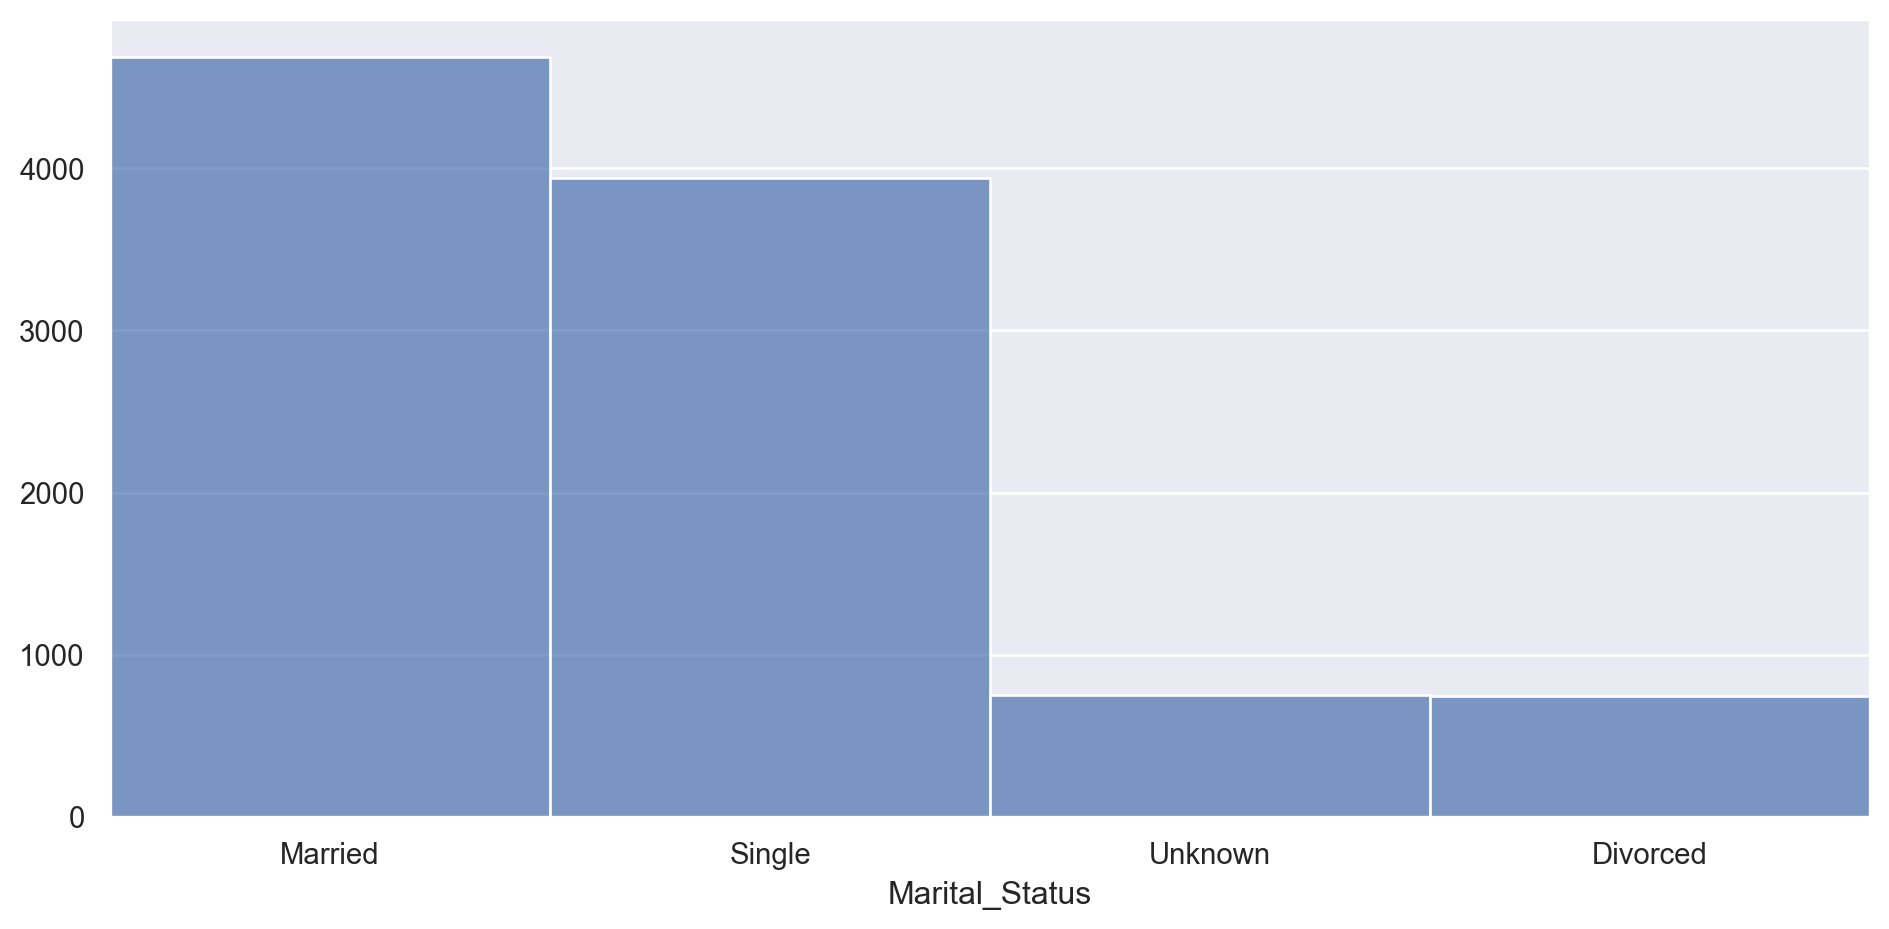

In [20]:
p = so.Plot(df, categorical[2]).layout(size=(10, 5))
p.add(so.Bars(), so.Hist())

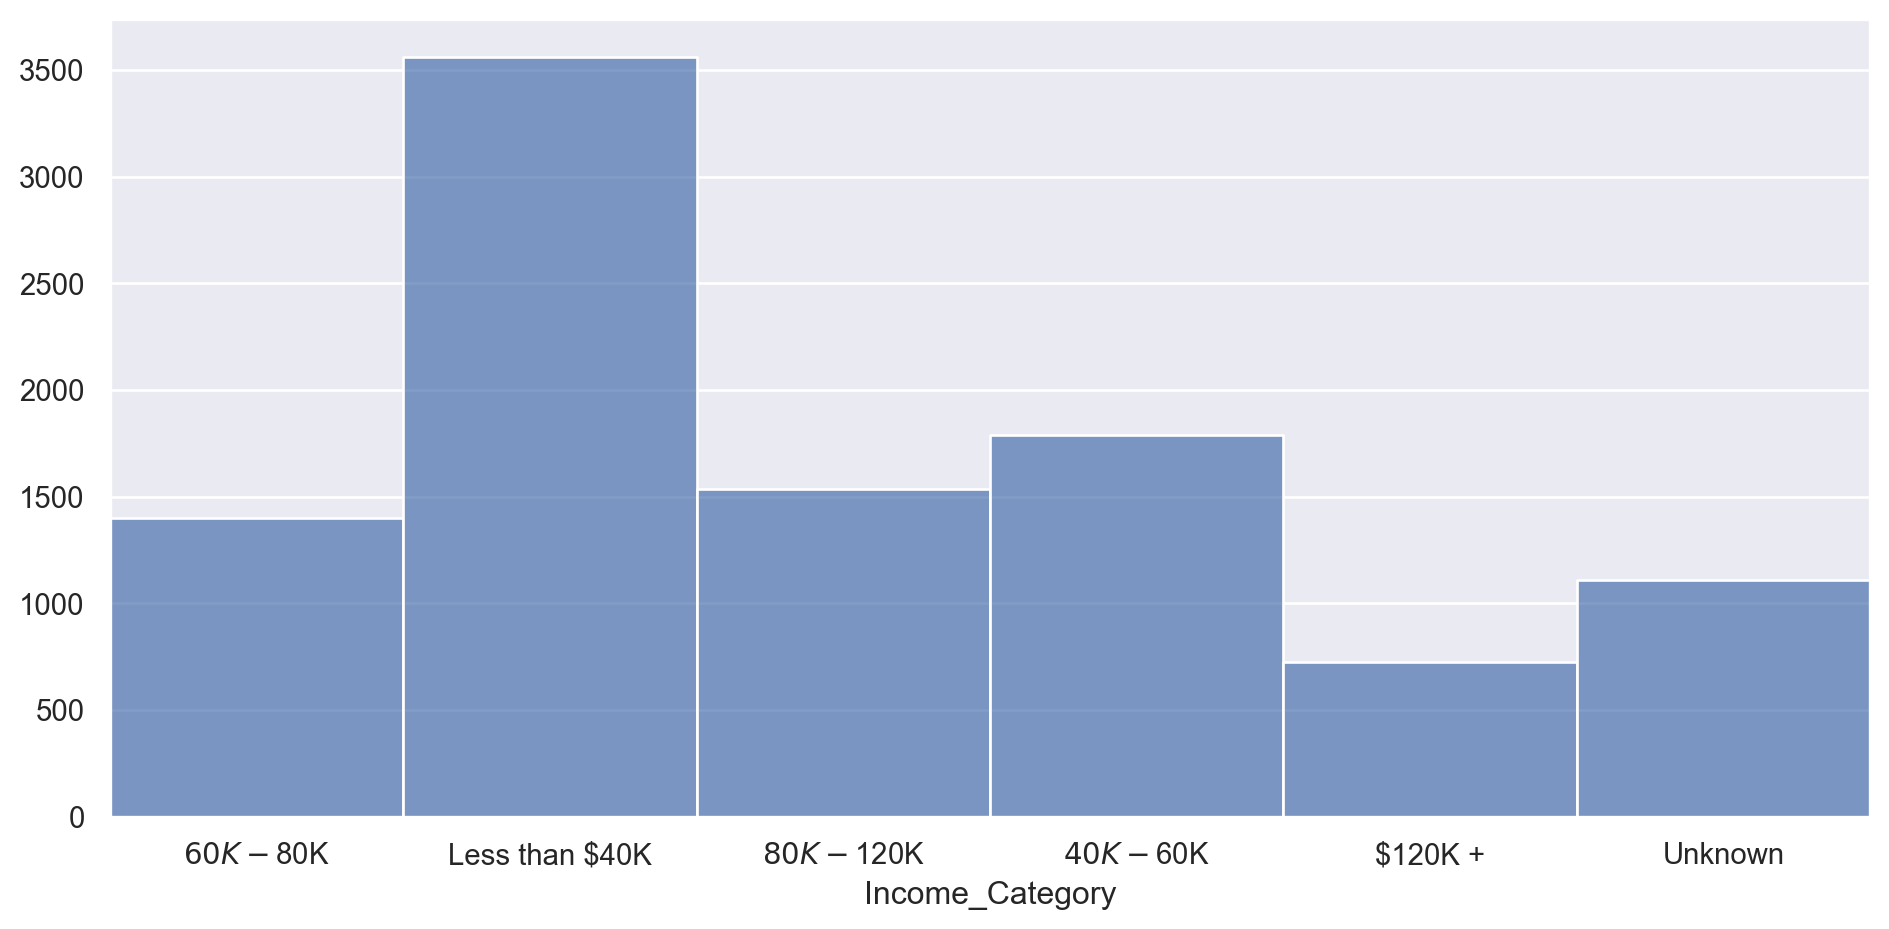

In [21]:
p = so.Plot(df, categorical[3]).layout(size=(10, 5))
p.add(so.Bars(), so.Hist())

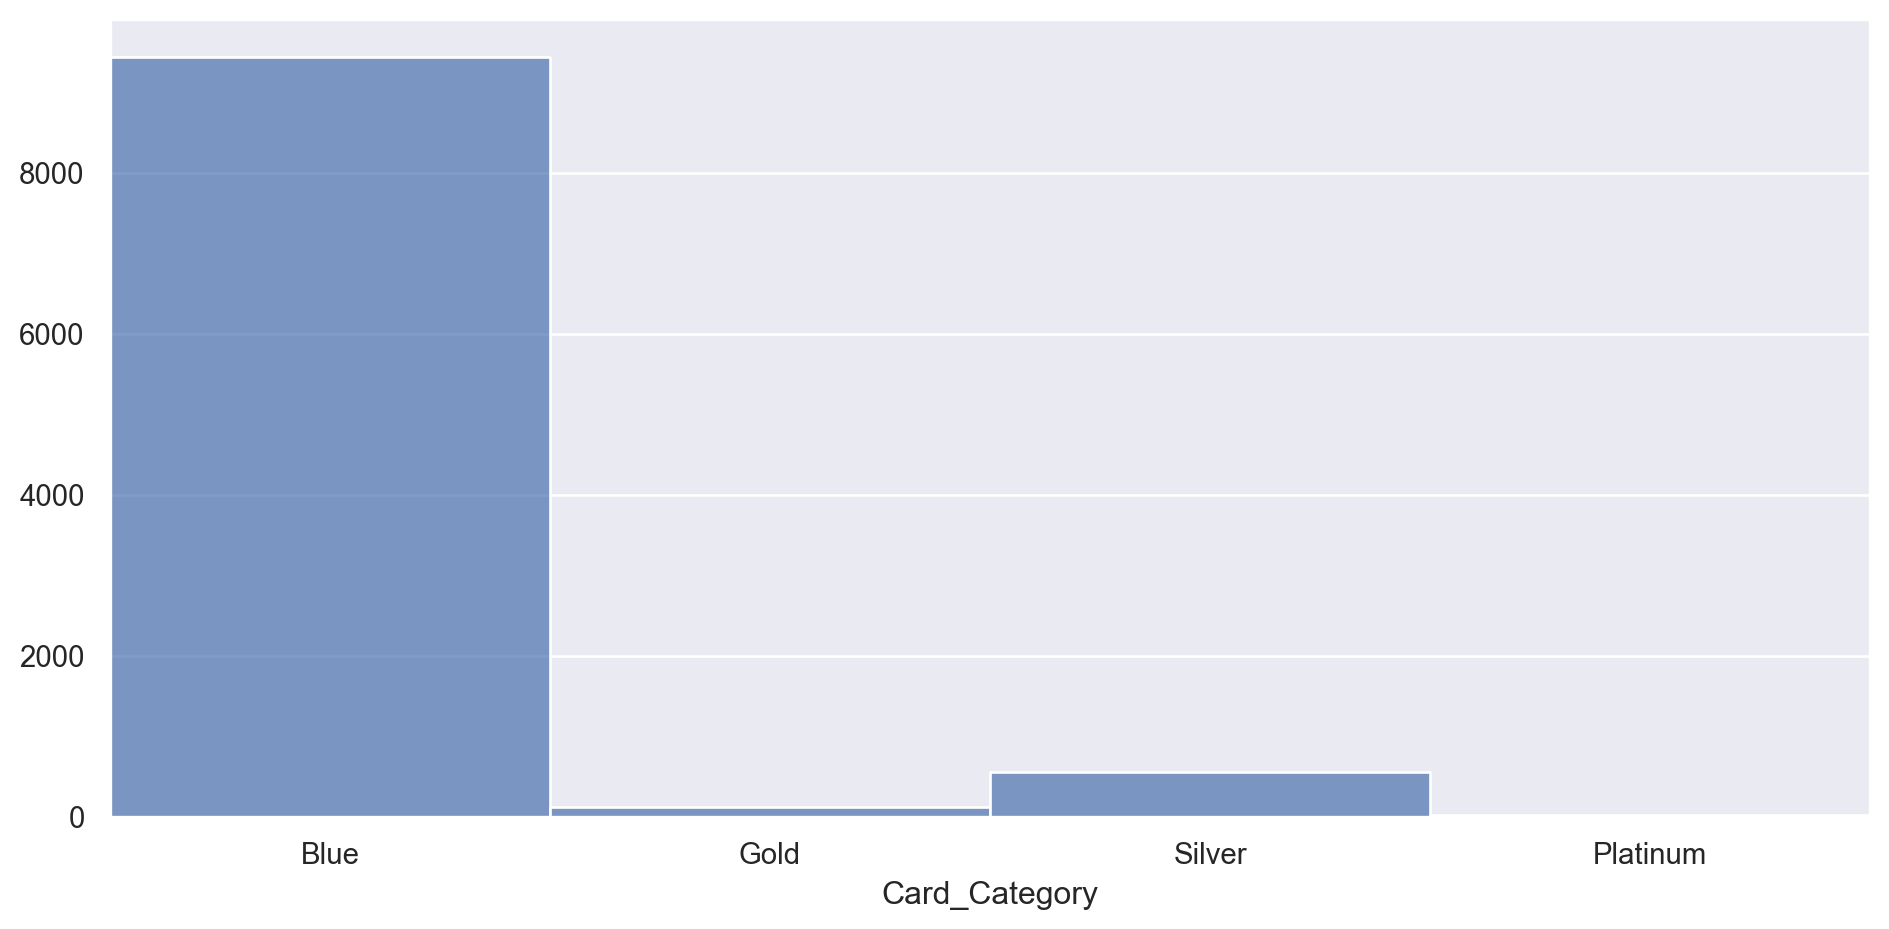

In [22]:
p = so.Plot(df, categorical[4]).layout(size=(10, 5))
p.add(so.Bars(), so.Hist())

In [23]:
df[df['Attrition_Flag'] == 0]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
21                  0            62      F                0        Graduate   
39                  0            66      F                0       Doctorate   
51                  0            54      F                1        Graduate   
54                  0            56      M                2        Graduate   
61                  0            48      M                2        Graduate   
...               ...           ...    ...              ...             ...   
10119               0            55      F                3      Uneducated   
10123               0            41      M                2         Unknown   
10124               0            44      F                1     High School   
10125               0            30      M                2        Graduate   
10126               0            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
21           Married  Less than $40K          Blue              49   
39           Married         Unknown          Blue              56   
51           Married  Less than $40K          Blue              40   
54           Married         $120K +          Blue              36   
61           Married     $60K - $80K        Silver              35   
...              ...             ...           ...             ...   
10119         Single         Unknown          Blue              47   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
21                            2                       3   
39                            5                       4   
51                            2                       3   
54                            1                       3   
61                            2                       4   
...                         ...                     ...   
10119                         4                       3   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
21                         3        1438.3                    0   
39                         3        7882.0                  605   
51                         1        1438.3                  808   
54                         3       15769.0                    0   
61                         4       34516.0                    0   
...                      ...           ...                  ...   
10119                      3       14657.0                 2517   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
21              1438.3                 1.047              692              16   
39              7277.0                 1.052              704              16   
51               630.3                 0.997              705              19   
54             15769.0                 1.041              602              15   
61             34516.0                 0.763              691              15   
...                ...                   ...              ...             ...   
10119          12140.0                 0.166             6009              53   
10123           2091.0                 0.804           

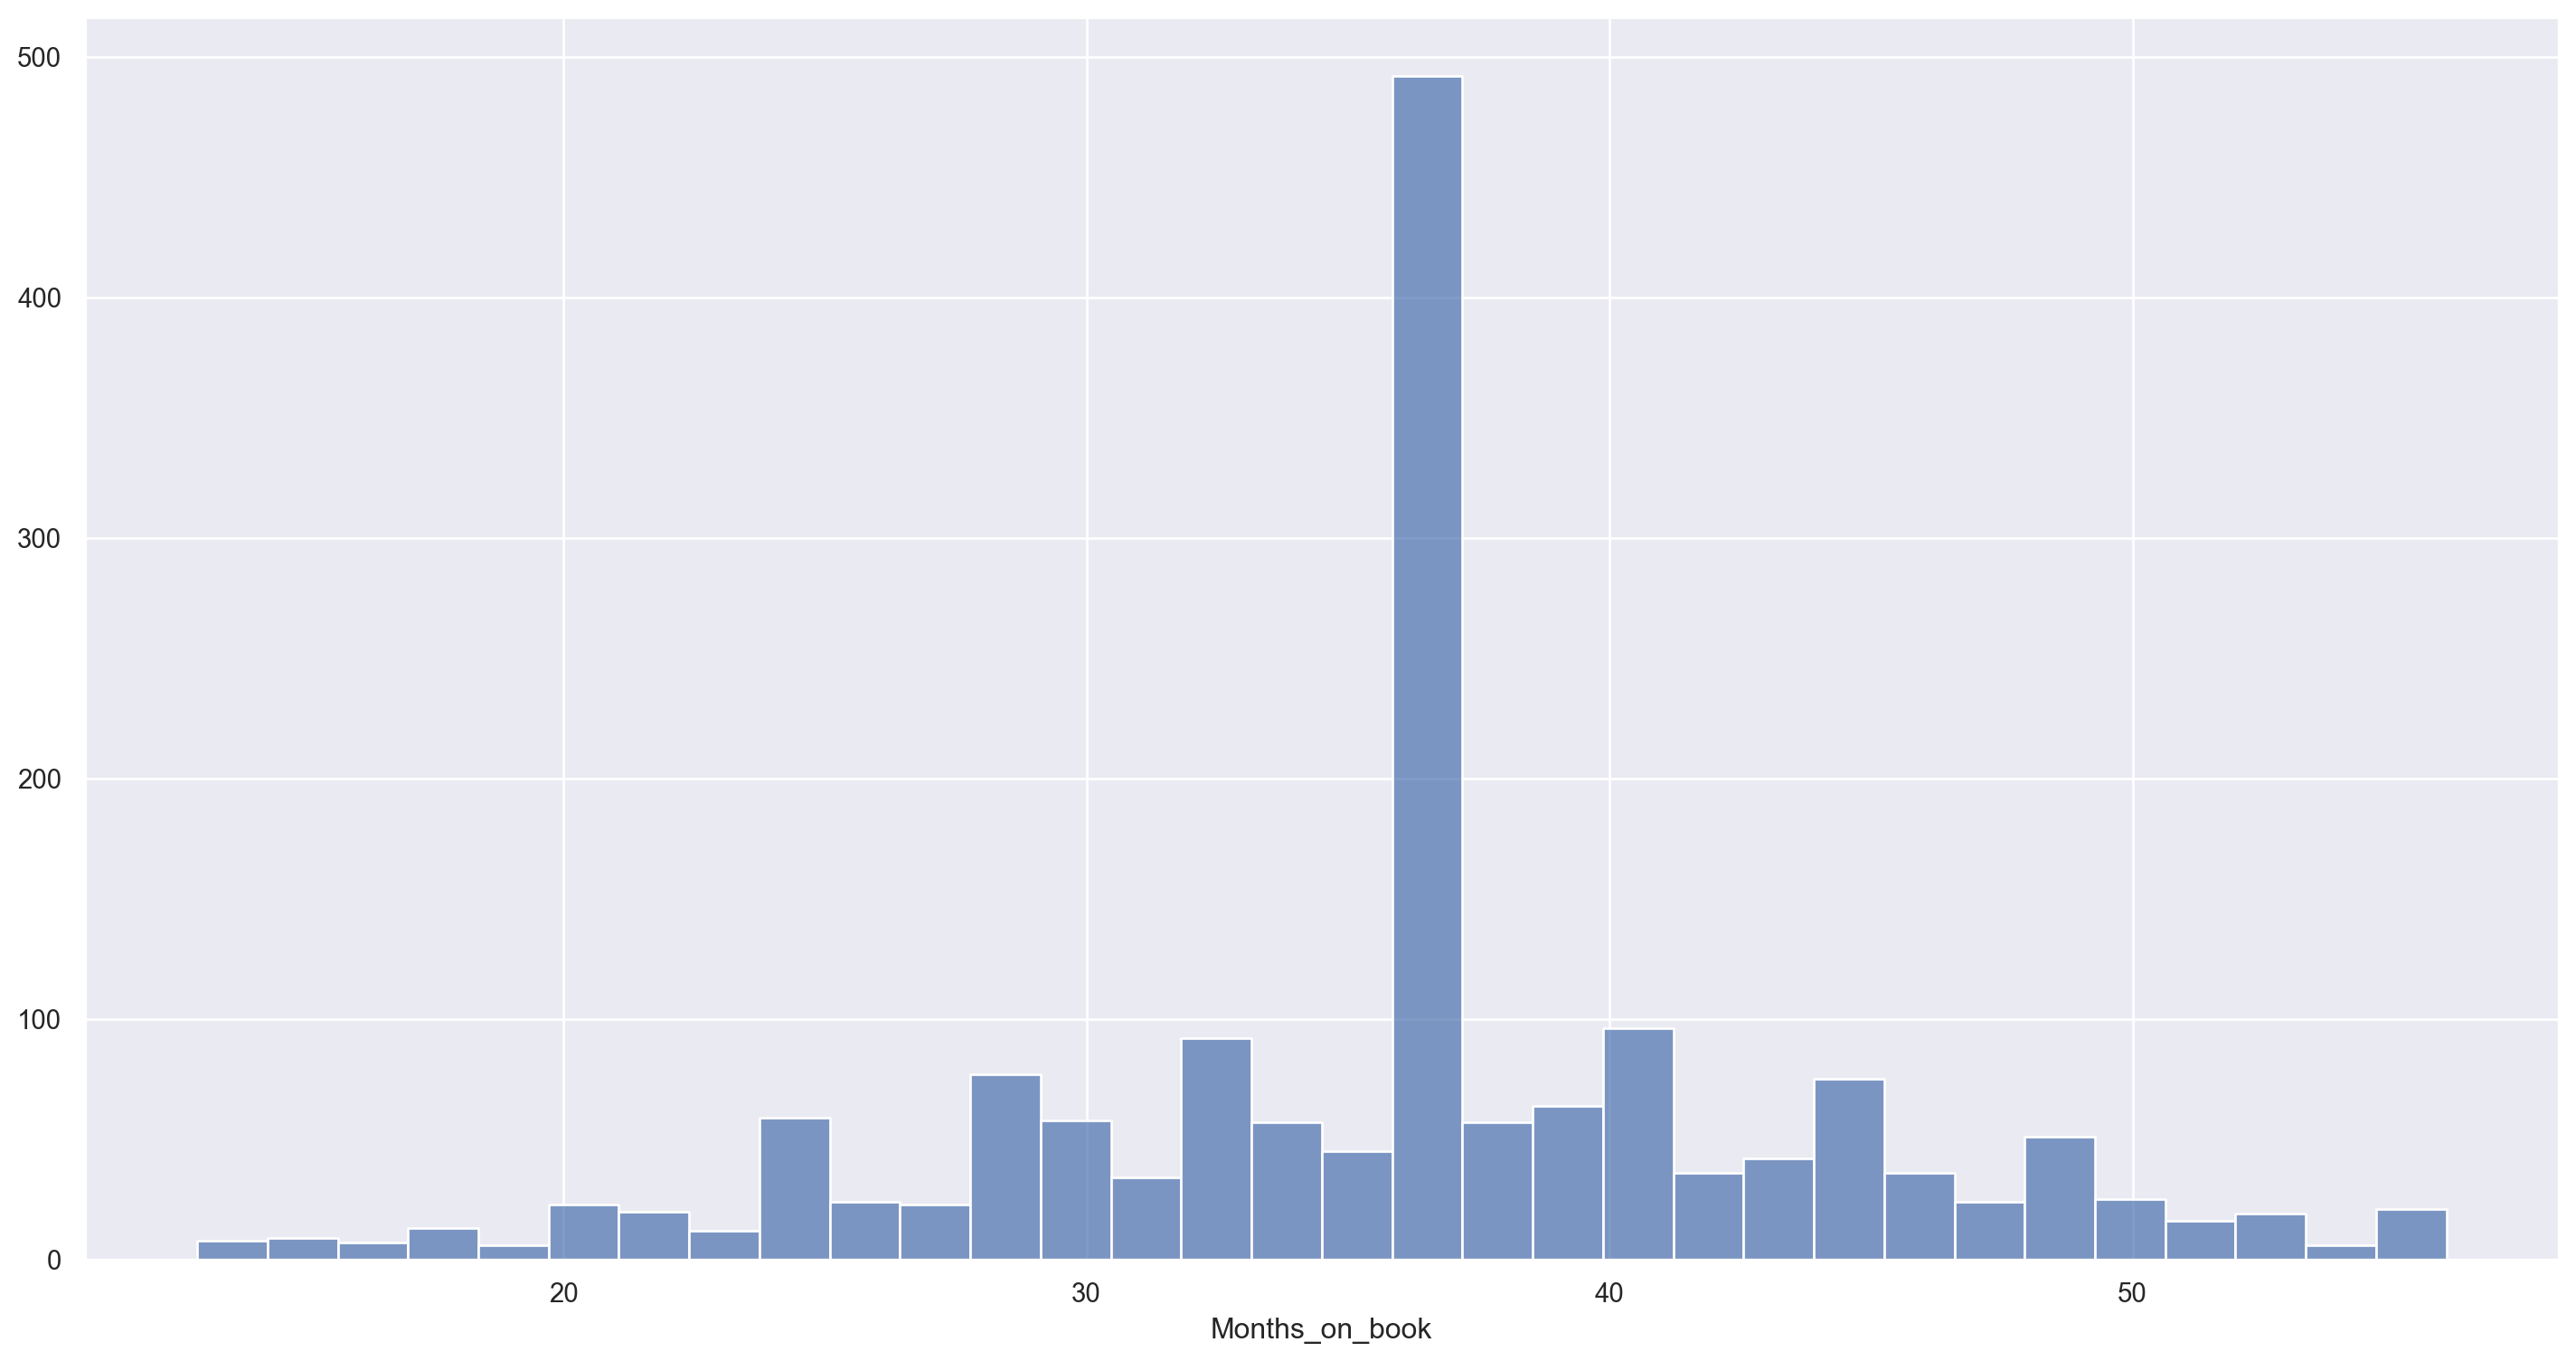

In [24]:
so.Plot(df[df['Attrition_Flag'] == 0], x="Months_on_book").add(so.Bars(), so.Hist()).layout(size=(15, 8))

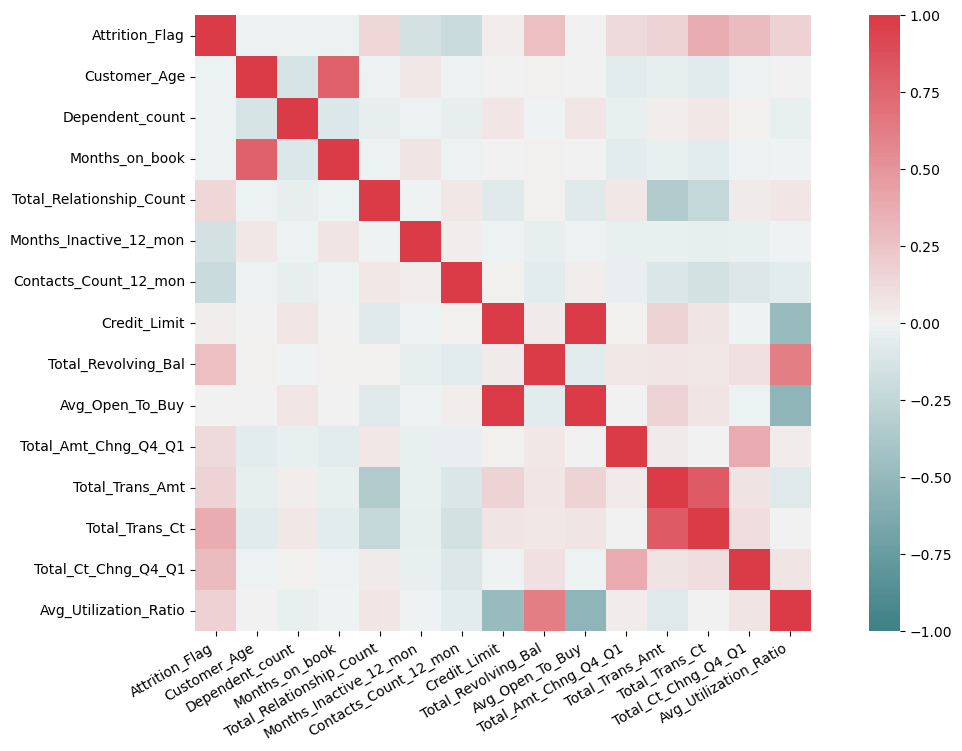

In [25]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [26]:
df

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                   1            45      M                3     High School   
1                   1            49      F                5        Graduate   
2                   1            51      M                3        Graduate   
3                   1            40      F                4     High School   
4                   1            40      M                3      Uneducated   
...               ...           ...    ...              ...             ...   
10122               1            50      M                2        Graduate   
10123               0            41      M                2         Unknown   
10124               0            44      F                1     High School   
10125               0            30      M                2        Graduate   
10126               0            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804           

In [27]:
encoded = pd.get_dummies(df[categorical], prefix=categorical)

In [28]:
df_enc = pd.concat([encoded, df], axis=1)
df_enc.drop(categorical, axis=1, inplace=True)

In [29]:
df_enc.dtypes

Gender_F                            uint8
Gender_M                            uint8
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Divorced             uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Marital_Status_Unknown              uint8
Income_Category_$120K +             uint8
Income_Category_$40K - $60K         uint8
Income_Category_$60K - $80K         uint8
Income_Category_$80K - $120K        uint8
Income_Category_Less than $40K      uint8
Income_Category_Unknown             uint8
Card_Category_Blue                  uint8
Card_Category_Gold                  uint8
Card_Category_Platinum              uint8
Card_Category_Silver                uint8
Attrition_Flag                    

In [30]:
def oversample(X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import random

np.random.seed(42)

X = df_enc.drop(["Attrition_Flag"], axis=1)
y = df_enc["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Oversample the train data
X_train, y_train = oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(13602, 37)
(2026, 37)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.9158564881043576
Accuracy 0.9555774925962488


In [33]:
from interpret.blackbox import LimeTabular


# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(rf.predict_proba, 
                   data=X_train, 
                   random_state=1)

In [ ]:
from interpret import show

# Get local explanations
lime_local = lime.explain_local(X_test[-10:], 
                                y_test[-10:], 
                                name='LIME')

show(lime_local)